# IMPORT LIBRARIES

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Embedding,Flatten,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.models import Sequential


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# IMPORT DATASET

In [2]:
#reading the dataset of both fake and true news
data_fake=pd.read_csv("E:\deepa\wahy_lab_solutions\data science\MODULE 8\lstm\projects\SPAM DETECTION_fake_news\Fake.csv")
data_true=pd.read_csv("E:\deepa\wahy_lab_solutions\data science\MODULE 8\lstm\projects\SPAM DETECTION_fake_news\True.csv")

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# EDA & PREPROCESSING

In [5]:
#creating an output/target column 
#fake news - 0
#true news - 1
data_fake['class']=0
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
##output column assigning to true news dataframe
data_true['class']=1
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
#concatinating the two dataframe of fake and true news
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
#droping the unnecessary columns
data=data_merge.drop(['title','subject','date'],axis=1)

In [9]:
#shuffling the entire dataset
data=data.sample(frac=1)  #randomly picking data in 1D,shuffling

In [10]:
#resetting the index and droping the shuffled index column
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [11]:
def clean(text):
    text=text.lower()# Convert to lowercase
    text=re.sub('[^a-zA-Z]', ' ', text)# Remove non-alphabetic characters
    text = re.sub('\[.*?\]', '', text)# Remove square brackets and content inside them
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # Remove punctuation
    text = re.sub('\w*\d\w*', '', text)# Remove words containing digits
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)# Remove special characters
    text = re.sub('\n', '', text) # Remove newline characters
    tokens = word_tokenize(text)# Tokenize the text
    stop_words = set(stopwords.words("english"))# Remove stop words
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words) # Join the cleaned words into a single string

In [12]:
nltk.download('punkt')
data['text']=data['text'].apply(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Convert Text to Integer data conversion

In [13]:
tokenizer = Tokenizer(num_words=5000, split=' ')# Initialize a Tokenizer with a vocabulary size of 5000
tokenizer.fit_on_texts(data['text'])# Fit the Tokenizer on the 'text' column of the DataFrame 'data',This step builds the vocabulary based on the text data.

X = tokenizer.texts_to_sequences(data['text'])# Convert the text data to sequences using the fitted Tokenizer,Each word in the text is replaced with its corresponding integer index from the vocabulary.
print("X" '/n',X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



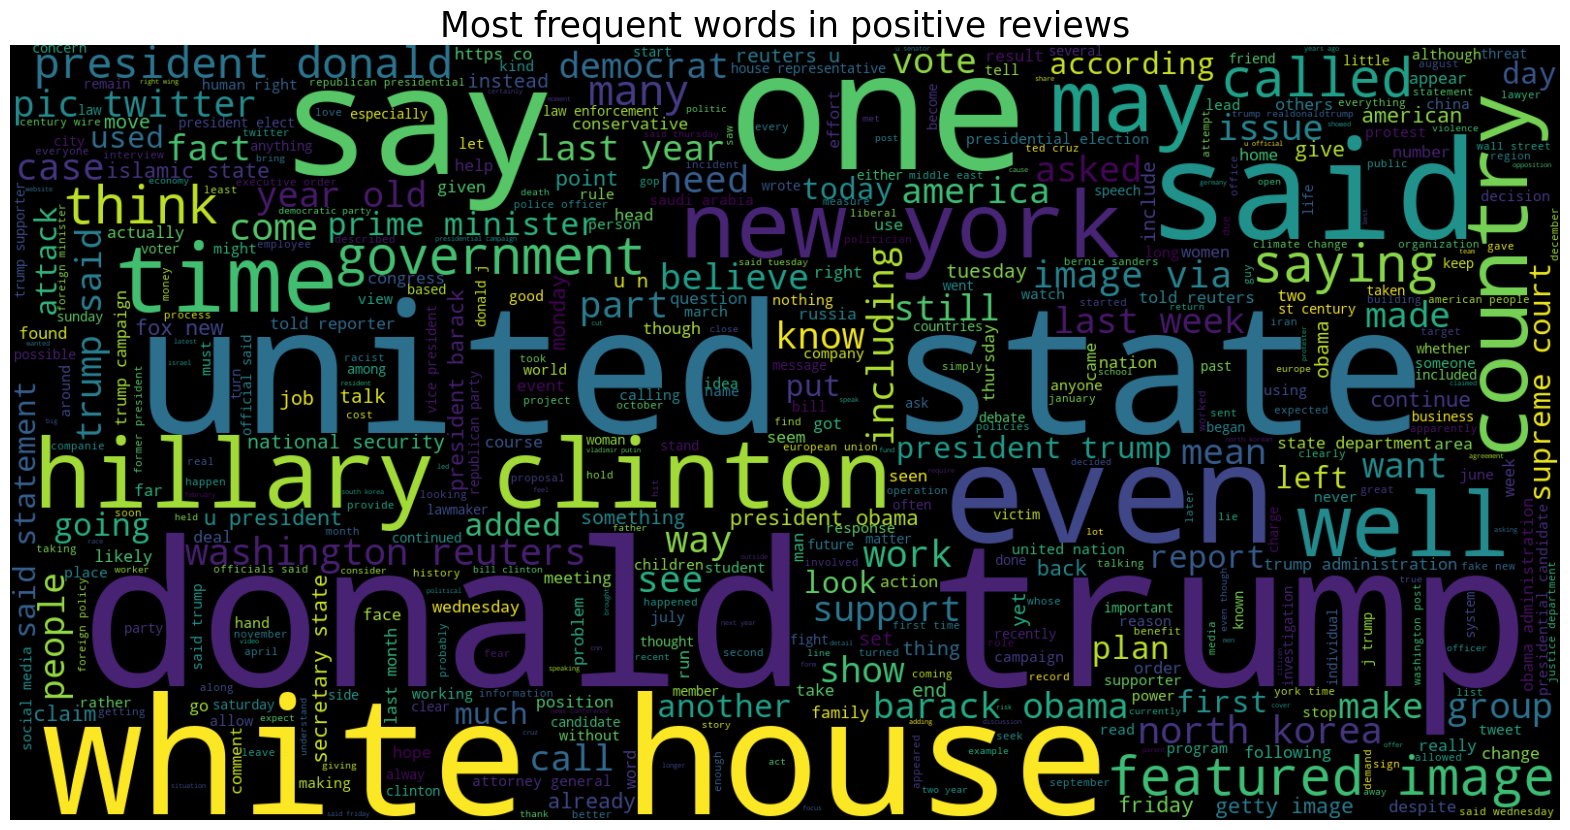

In [14]:
#creating a word cloud visualization using the WordCloud library
text=' '.join([word for word in data['text']])#Concatenates all the text entries in the 'text' column of the DataFrame data into a single string.
plt.figure(figsize=(20,15),facecolor='None')#Sets up the figure for plotting with a specified size and no background color.
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)#Creates a WordCloud object with parameters such as maximum number of words (max_words), width, and height.
plt.imshow(wordcloud,interpolation='bilinear')#Displays the word cloud using the imshow function from matplotlib with bilinear interpolation.
plt.axis("off")#Turns off the axis for a cleaner visualization
plt.title('Most frequent words in positive reviews', fontsize=25)#Sets the title for the word cloud.
plt.show()#Displays the word cloud visualization.

In [15]:

maxlen = 45# Set the maximum length of sequences
vocab_size = len(tokenizer.word_index)+1# Get the vocabulary size from the fitted Tokenizer
X = pad_sequences(X,padding='post',maxlen=maxlen)# Pad the sequences to the specified maximum length
X#independent variable

array([[  68,   42, 1552, ...,  103,   68, 1912],
       [ 185,   46, 1743, ...,   31,   64,  659],
       [ 639, 3336,  950, ...,  347,  845, 1120],
       ...,
       [   2,  232, 1964, ...,  305,  307, 1053],
       [ 302,   17,  302, ...,   10,  128,  162],
       [ 320,  240, 1023, ..., 2437,  529, 4968]])

# LSTM  MODEL BUILDING

#### Model Creation

In [16]:
y = data['class']
Y=y.values
Y#taregt

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40,stratify=Y)#training data, testing data split

In [18]:
EMBEDDING_SIZE = 128#Specifies the size or dimensionality of word embeddings
HIDDEN_LAYER_SIZE = 64#Indicates the number of neurons or units in hidden layers of a neural network
BATCH_SIZE = 32
NUM_EPOCHS = 10
MAX_sentense_len=45

In [19]:
# Define a Sequential model
model = Sequential()
# Add an Embedding layer
model.add(Embedding(vocab_size, 128, input_length= maxlen,name="embedding"))#embedding_size
# Add a SpatialDropout1D layer
model.add(SpatialDropout1D(0.4))
# Add an LSTM layer
model.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2))
# Add a Flatten layer
model.add(Flatten())
# Add a Dense layer with 1 neuron (for binary classification)
model.add(Dense(1))
# Add a Sigmoid activation layer
model.add(Activation('sigmoid'))
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 128)           14762880  
                                                                 
 spatial_dropout1d (Spatial  (None, 45, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

#### Configuration / Compilation Step

In [20]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Training Step

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1123/1123 [==============================] - 118s 100ms/step - loss: 0.6804 - accuracy: 0.5477 - val_loss: 0.6642 - val_accuracy: 0.5944
Epoch 2/20
1123/1123 [==============================] - 111s 99ms/step - loss: 0.6158 - accuracy: 0.7630 - val_loss: 0.4335 - val_accuracy: 0.8649
Epoch 3/20
1123/1123 [==============================] - 138s 123ms/step - loss: 0.3411 - accuracy: 0.8583 - val_loss: 0.2369 - val_accuracy: 0.9073
Epoch 4/20
1123/1123 [==============================] - 121s 107ms/step - loss: 0.2134 - accuracy: 0.9184 - val_loss: 0.1744 - val_accuracy: 0.9429
Epoch 5/20
1123/1123 [==============================] - 126s 112ms/step - loss: 0.1676 - accuracy: 0.9373 - val_loss: 0.3097 - val_accuracy: 0.8526
Epoch 6/20
1123/1123 [==============================] - 124s 110ms/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.1247 - val_accuracy: 0.9548
Epoch 7/20
1123/1123 [==============================] - 125s 111ms/step - loss: 0.1271 - accuracy: 0.9529 - val_l

#### Evaluation Step

In [22]:
loss,acc =  model.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

281/281 [==============================] - 2s 7ms/step - loss: 0.1497 - accuracy: 0.9502
testing accuracy 95.0%
